In [60]:
import pandas as pd
import numpy as np
import math
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

#Maximize (delta+gamma -theta) while chossing strike

In [82]:
#For this data ATM is at 17500
df = pd.read_csv('opt_chain.csv')

In [83]:
df = df.apply(pd.to_numeric, errors = 'coerce')

In [84]:
df.Instrument = df['Instrument'].replace(np.nan, 'NIFTY')

In [64]:
df

,Call OI,Call LTP,Call Delta,Strike,IV,Instrument,Put LTP,Put Delta,Put OI,Theta,Vega,Gamma
0,450.0,1595.20,0.92,16100,18.25,NIFTY,46.00,-0.08,82450.0,-1.87,9.85,0.00013
1,0.0,0.00,0.87,16150,22.26,NIFTY,100.15,-0.13,650.0,-3.21,13.83,0.00015
2,3050.0,1436.35,0.90,16200,17.97,NIFTY,53.20,-0.10,567400.0,-2.04,10.88,0.00015
3,0.0,0.00,0.90,16250,17.74,NIFTY,56.20,-0.10,1450.0,-2.10,11.34,0.00016
4,850.0,1364.55,0.89,16300,17.68,NIFTY,61.45,-0.11,137900.0,-2.21,11.98,0.00017
...,...,...,...,...,...,...,...,...,...,...,...,...
56,6250.0,23.00,0.07,18900,12.82,NIFTY,1439.10,-0.93,100.0,-1.09,8.14,0.00016
57,1350.0,20.15,0.06,18950,12.82,NIFTY,1382.80,-0.94,50.0,-0.99,7.45,0.00014
58,454600.0,19.10,0.06,19000,13.03,NIFTY,1409.40,-0.94,34800.0,-0.96,7.11,0.00013
59,1600.0,21.30,0.06,19050,13.69,NIFTY,0.00,-0.94,0.0,-1.06,7.41,0.00013


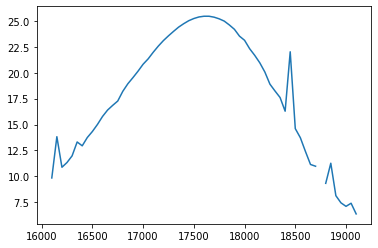

In [65]:
#As expected vega is max at ATM
plt.plot(df.Strike ,df['Vega'])

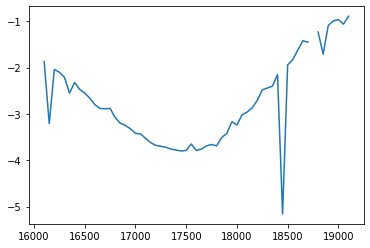

In [66]:
#Theta should be most negative at ATM, but what is happening at 18500?
plt.plot(df.Strike ,df['Theta'])

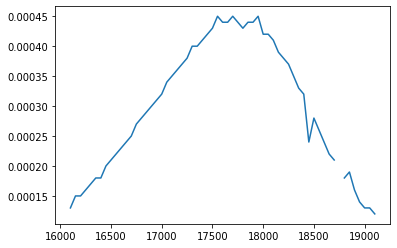

In [67]:
plt.plot(df.Strike ,df['Gamma'])

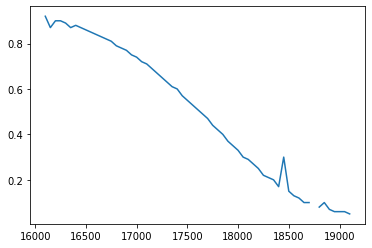

In [68]:
plt.plot(df.Strike ,df['Call Delta'])

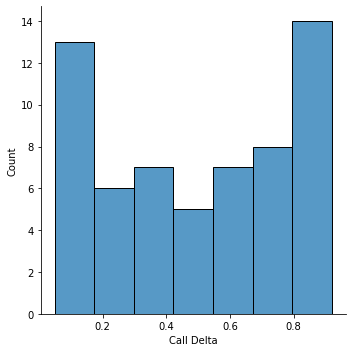

In [69]:
sns.displot(df['Call Delta'])

In [70]:
df['Call_del+gam-theta'] = df['Call Delta']+df['Gamma']+df['Theta']
df['Put_del+gam-theta'] = df['Put Delta']+df['Gamma']+df['Theta']

In [71]:
df[df['Call_del+gam-theta'] == df['Call_del+gam-theta'].max()]

,Call OI,Call LTP,Call Delta,Strike,IV,Instrument,Put LTP,Put Delta,Put OI,Theta,Vega,Gamma,Call_del+gam-theta,Put_del+gam-theta
60,2950.0,16.75,0.05,19100,13.37,NIFTY,1605.3,-0.95,100.0,-0.89,6.38,0.00012,-0.83988,-1.83988


In [72]:
df[df.Theta== df.Theta.max()]

,Call OI,Call LTP,Call Delta,Strike,IV,Instrument,Put LTP,Put Delta,Put OI,Theta,Vega,Gamma,Call_del+gam-theta,Put_del+gam-theta
60,2950.0,16.75,0.05,19100,13.37,NIFTY,1605.3,-0.95,100.0,-0.89,6.38,0.00012,-0.83988,-1.83988


In [73]:

def take_inputs():
   
    val = input('Hey! Welcome to Strategy Choosing Program. Please enter your preferences\n\nAre you bullish?:Enter b\nIf bearish:Enter be\nExpect Underlying to be range bound?:Enter r\nIf Expect Either Side Large Moves?:Enter mn\n\n')
    if val == 'b':
        rang = float(input('What % Of Upward Move is Expected?If 5%, Enter 5\n\n'))
    if val == 'be':
        rang = float(input('What % of Downward Move is Expected?If 5%, Enter 5\n\n'))
    if val == 'r':
        rang = float(input('What % Range From Spot is Expected?If 2%, Enter 2\n\n'))
    if val == 'mn':
        rang = float(input('Market Neutral:% Move Expected On Either Side?If 3%, Enter 3\n\n'))
    
    return val, rang

In [85]:
df[(df.Strike>=17000) & (df.Strike<=18000)]

,Call OI,Call LTP,Call Delta,Strike,IV,Instrument,Put LTP,Put Delta,Put OI,Theta,Vega,Gamma
18,179300.0,760.55,0.74,17000,15.77,NIFTY,165.25,-0.26,1165300.0,-3.42,20.82,0.00032
19,1350.0,667.20,0.72,17050,15.43,NIFTY,172.65,-0.28,2600.0,-3.43,21.34,0.00034
20,27450.0,707.80,0.71,17100,15.43,NIFTY,187.75,-0.29,67000.0,-3.53,21.98,0.00035
21,1200.0,660.00,0.69,17150,15.39,NIFTY,203.00,-0.31,3450.0,-3.62,22.57,0.00036
22,79850.0,617.20,0.67,17200,15.29,NIFTY,217.85,-0.33,646850.0,-3.68,23.10,0.00037
23,3550.0,595.85,0.65,17250,15.07,NIFTY,230.60,-0.35,2550.0,-3.70,23.56,0.00038
24,62350.0,547.75,0.63,17300,14.89,NIFTY,245.00,-0.37,70350.0,-3.72,23.99,0.00040
25,1800.0,500.00,0.61,17350,14.81,NIFTY,263.00,-0.39,650.0,-3.76,24.40,0.00040
26,55250.0,478.05,0.60,17400,14.66,NIFTY,280.00,-0.40,62500.0,-3.78,24.73,0.00041
27,3050.0,456.15,0.57,17450,14.59,NIFTY,300.00,-0.43,2100.0,-3.80,25.02,0.00042


In [8]:
class WhichStrategy():
    def __init__(self):
        self.sentiment, self.emove = take_inputs()

    def choose(self):
        if self.sentiment == 'b':
            if self.emove >= 2:
                
        if self.sentiment == 'be':
            if self.emove >= 2:
                pass
                
        if self.sentiment == 'r':
            if self.emove <= 2:
                pass
        if self.sentiment == 'mn':
            if self.emove >= 2.5:
                pass
        else:
            print('entered value is of wrong format')

IndentationError: expected an indented block (3352233058.py, line 9)

In [89]:
#Maximize (delta+gamma -theta) while chossing strike
#LS -> Lower strike 
#spot -> Spot price 
#HS -> Higher strike
#hsp -> Higher strike Premium
#lsp -> Lower strike Premium

class Strategy():
    def __init__(self, LS, spot, HS, hsp, lsp): 
        def round_spot(spot):
            if spot%100>50:
                spot -= (spot%100)
                spot += 100
            else:
                spot -= spot%100
            return spot
        
        self.spot = round_spot(spot)
        self.LS = LS
        self.HS = HS
        self.premium1 = hsp
        self.premium2 = lsp
        self.market_expiry = [expiry for expiry in range(self.spot-1500, self.spot+1500, 100)]
        deviation = [(expiry-spot)/spot*100 for expiry in self.market_expiry]
        self.lsdf = pd.DataFrame({'market_expiry':self.market_expiry, 'mx_%deviation':deviation})
        
    def long_strangle(self):
        print(f"Buy OTM {self.HS} CE, Buy OTM {self.LS} PE")
        ce_payoff = [(max(expiry - self.HS, 0 ) - self.premium1) for expiry in self.market_expiry]
        pe_payoff = [(max(self.LS - expiry, 0 ) - self.premium2) for expiry in self.market_expiry]
        self.lsdf['ce_payoff'] = ce_payoff
        self.lsdf['pe_payoff'] = pe_payoff      
        self.lsdf['strategy_payoff'] = self.lsdf.ce_payoff + self.lsdf.pe_payoff
        net_credit = -(self.premium1 + self.premium2)
        maxloss = net_credit
        lower_breakeven = self.LS + maxloss
        upper_breakeven = self.HS - maxloss
        print(f'Breakeven_points:{(lower_breakeven, upper_breakeven)}\nMaxloss:{maxloss}\nNet_Credit:{net_credit}')
        print(self.lsdf)
        plt.plot(self.lsdf['market_expiry'],self.lsdf['strategy_payoff'])
        plt.axhline(y=0, color='r', linestyle='-')
        
    def short_strangle(self):
        print(f"Sell OTM {self.HS} CE, Sell OTM {self.LS} PE")
        ce_payoff = [(self.premium1 - max(expiry - self.HS, 0 )) for expiry in self.market_expiry]
        pe_payoff = [(self.premium2 - max(self.LS - expiry, 0 ) ) for expiry in self.market_expiry]
        self.lsdf['ce_payoff'] = ce_payoff
        self.lsdf['pe_payoff'] = pe_payoff
        self.lsdf['strategy_payoff'] = self.lsdf.ce_payoff + self.lsdf.pe_payoff
        net_credit = self.premium1 + self.premium2
        maxprofit = net_credit
        lower_breakeven = self.LS - net_credit
        upper_breakeven = self.HS + net_credit
        print(f'Breakeven_points:{(lower_breakeven, upper_breakeven)}\nMaxProfit:{maxprofit}\nNet_credit:{net_credit}')
        print(self.lsdf)
        plt.plot(self.lsdf['market_expiry'], self.lsdf['strategy_payoff'])
        plt.axhline(y=0, color='r', linestyle='-')
    
    def long_straddle(self):
        print(f"Buy ATM {self.HS} CE, Buy ATM {self.LS} PE")
        ce_payoff = [(max(expiry - self.HS, 0 ) - self.premium1) for expiry in self.market_expiry]
        pe_payoff = [(max(self.LS - expiry, 0 ) - self.premium2) for expiry in self.market_expiry]
        self.lsdf['ce_payoff'] = ce_payoff
        self.lsdf['pe_payoff'] = pe_payoff
        self.lsdf['strategy_payoff'] = self.lsdf.ce_payoff + self.lsdf.pe_payoff
        net_credit = -(self.premium1 + self.premium2)
        maxloss = net_credit
        lower_breakeven = self.LS + net_credit
        upper_breakeven = self.HS - net_credit
        print(f'Breakeven_points:{(lower_breakeven, upper_breakeven)}\nMaxloss:{maxloss}\nNet_credit:{net_credit}')
        print(self.lsdf)
        plt.plot(self.lsdf['market_expiry'],self.lsdf['strategy_payoff'])
        plt.axhline(y=0, color='r', linestyle='-')
        
    def short_straddle(self):
        print(f"Sell ATM {self.HS} CE, Sell ATM {self.LS} PE")
        ce_payoff = [(self.premium1 - max(expiry - self.HS, 0 )) for expiry in self.market_expiry]
        pe_payoff = [(self.premium2 - max(self.LS - expiry, 0 ) ) for expiry in self.market_expiry]
        self.lsdf['ce_payoff'] = ce_payoff
        self.lsdf['pe_payoff'] = pe_payoff
        self.lsdf['strategy_payoff'] = self.lsdf.ce_payoff + self.lsdf.pe_payoff
        net_credit = self.premium1 + self.premium2
        maxprofit = net_credit
        lower_breakeven = self.LS - net_credit
        upper_breakeven = self.HS + net_credit
        print(f'Breakeven_points:{(lower_breakeven, upper_breakeven)}\nMaxProfit:{maxprofit}\nNet_credit:{net_credit}')
        print(self.lsdf)
        plt.plot(self.lsdf['market_expiry'],self.lsdf['strategy_payoff'])
        plt.axhline(y=0, color='r', linestyle='-')
    
    def bull_put_spread(self):
        print(f"Buy OTM {self.LS} PE, Sell ITM {self.HS} PE")
        hs_pe_payoff = [(self.premium1 - max(self.HS - expiry, 0 ) ) for expiry in self.market_expiry]
        ls_pe_payoff = [(max(self.LS - expiry, 0 ) - self.premium2) for expiry in self.market_expiry]
        self.lsdf['otm_pe_payoff'] = ls_pe_payoff
        self.lsdf['itm_pe_payoff'] = hs_pe_payoff
        self.lsdf['strategy_payoff'] = self.lsdf.otm_pe_payoff + self.lsdf.itm_pe_payoff  
        net_credit = self.premium1 - self.premium2
        maxprofit = net_credit
        spread = self.HS - self.LS
        maxloss =   spread - net_credit
        breakeven = self.HS - net_credit       
        print(f'Breakeven_point:{breakeven}\nMaxProfit:{maxprofit}\nMaxLoss:{maxloss}\nNet_credit:{net_credit}')
        print(self.lsdf)
        plt.plot(self.lsdf['market_expiry'],self.lsdf['strategy_payoff'])
        plt.axhline(y=0, color='r', linestyle='-')
        
    def bull_call_spread(self):
        print(f"Buy ITM {self.LS} CE, Sell OTM {self.HS} CE")
        hs_pe_payoff = [(self.premium1 - max(expiry - self.HS, 0 ) ) for expiry in self.market_expiry]
        ls_pe_payoff = [(max(expiry - self.LS, 0 ) - self.premium2) for expiry in self.market_expiry]
        self.lsdf['otm_pe_payoff'] = ls_pe_payoff
        self.lsdf['itm_pe_payoff'] = hs_pe_payoff
        self.lsdf['strategy_payoff'] = self.lsdf.otm_pe_payoff + self.lsdf.itm_pe_payoff   
        spread = self.HS - self.LS
        net_credit = self.premium1 - self.premium2 #Net debit
        maxprofit = spread + net_credit
        maxloss =   net_credit
        breakeven = self.HS - maxprofit       
        print(f'Breakeven_point:{breakeven}\nMaxProfit:{maxprofit}\nMaxLoss:{maxloss}\nNet_credit:{net_credit}')
        print(self.lsdf)
        plt.plot(self.lsdf['market_expiry'],self.lsdf['strategy_payoff'])
        plt.axhline(y=0, color='r', linestyle='-')
    
    def bear_put_spread(self):
        print(f"Buy ITM {self.HS} PE, Sell OTM {self.LS} PE")
        hs_pe_payoff = [(max(self.HS - expiry, 0 ) - self.premium1) for expiry in self.market_expiry]
        ls_pe_payoff = [(self.premium2 - max(self.LS - expiry, 0 ) ) for expiry in self.market_expiry]
        self.lsdf['otm_pe_payoff'] = ls_pe_payoff
        self.lsdf['itm_pe_payoff'] = hs_pe_payoff
        self.lsdf['strategy_payoff'] = self.lsdf.otm_pe_payoff + self.lsdf.itm_pe_payoff
        spread = self.HS - self.LS
        net_credit = -(self.premium1 - self.premium2)
        maxloss =   net_credit
        maxprofit = spread - net_credit        
        breakeven = self.HS - net_credit       
        print(f'Breakeven_point:{breakeven}\nMaxProfit:{maxprofit}\nMaxLoss:{maxloss}\nNet_credit:{net_credit}')
        print(self.lsdf)
        plt.plot(self.lsdf['market_expiry'], self.lsdf['strategy_payoff'])
        plt.axhline(y=0, color='r', linestyle='-')
        
    def bear_call_spread(self):
        print(f"Buy OTM {self.HS} CE, Sell ITM {self.LS} CE")
        hs_ce_payoff = [(max(expiry - self.HS, 0 ) - self.premium1) for expiry in self.market_expiry]
        ls_ce_payoff = [(self.premium2 - max(expiry - self.LS, 0 ) ) for expiry in self.market_expiry]
        self.lsdf['otm_ce_payoff'] = hs_ce_payoff
        self.lsdf['itm_ce_payoff'] = ls_ce_payoff        
        lsdf['strategy_payoff'] = self.lsdf.otm_ce_payoff + self.lsdf.itm_ce_payoff        
        spread = self.HS - self.LS
        net_credit = (self.premium1 - self.premium2)
        maxprofit =   net_credit
        maxloss = spread - net_credit        
        breakeven = self.LS + net_credit       
        print(f'Breakeven_point:{breakeven}\nMaxProfit:{maxprofit}\nMaxLoss:{maxloss}\nNet_credit:{net_credit}')
        print(self.lsdf)
        plt.plot(self.lsdf['market_expiry'],self.lsdf['strategy_payoff'])
        plt.axhline(y=0, color='r', linestyle='-')
    
    def call_ratio_back_spread(self):
        print(f"Buy 2 OTM {self.HS} CE, Sell ITM {self.LS} CE")
        hs_ce_payoff = [(2*max(expiry - self.HS, 0 ) - self.premium1) for expiry in self.market_expiry]
        ls_ce_payoff = [(self.premium2 - max(expiry - self.LS, 0 ) ) for expiry in self.market_expiry]
        self.lsdf['otm_ce_payoff'] = hs_ce_payoff
        self.lsdf['itm_ce_payoff'] = ls_ce_payoff
        self.lsdf['strategy_payoff'] = self.lsdf.otm_ce_payoff + self.lsdf.itm_ce_payoff       
        net_credit = (self.premium2 - self.premium1)
        spread = self.HS - self.LS
        maxloss = -(spread - net_credit)
        lower_breakeven = self.LS + net_credit
        upper_breakeven = self.HS - maxloss
        
        print(f'Breakeven_points:{(lower_breakeven, upper_breakeven)}\nMaxloss:{maxloss}\nNet_credit:{net_credit}')
        print(self.lsdf)
        plt.plot(self.lsdf['market_expiry'],self.lsdf['strategy_payoff'])
        plt.axhline(y=0, color='r', linestyle='-')
        
    def put_ratio_back_spread(self):
        print(f"Buy 2 OTM {self.LS} PE, Sell ITM {self.HS} PE")
        hs_pe_payoff = [(self.premium1 - max(self.HS - expiry, 0 ) ) for expiry in self.market_expiry]
        ls_pe_payoff = [(2*max(self.LS - expiry, 0 ) - self.premium2 ) for expiry in self.market_expiry]
        self.lsdf['otm_pe_payoff'] = ls_pe_payoff
        self.lsdf['itm_pe_payoff'] = hs_pe_payoff
        self.lsdf['strategy_payoff'] = self.lsdf.otm_pe_payoff + self.lsdf.itm_pe_payoff
        
        net_credit = self.premium1 - self.premium2
        spread = self.HS - self.LS
        maxloss = -(spread - net_credit)
        lower_breakeven = self.LS + maxloss
        upper_breakeven = self.LS - maxloss
        
        print(f'Breakeven_points:{(lower_breakeven, upper_breakeven)}\nMaxloss:{maxloss}\nNet_credit:{net_credit}')
        print(self.lsdf)
        plt.plot(self.lsdf['market_expiry'], self.lsdf['strategy_payoff'])
        plt.axhline(y=0, color='r', linestyle='-')
    

Buy ITM 17400 CE, Sell OTM 17500 CE
Breakeven_point:17483
MaxProfit:17
MaxLoss:-83
Net_credit:-83
    market_expiry  mx_%deviation  otm_pe_payoff  itm_pe_payoff  \
0           15900      -8.620690           -325            242   
1           16000      -8.045977           -325            242   
2           16100      -7.471264           -325            242   
3           16200      -6.896552           -325            242   
4           16300      -6.321839           -325            242   
5           16400      -5.747126           -325            242   
6           16500      -5.172414           -325            242   
7           16600      -4.597701           -325            242   
8           16700      -4.022989           -325            242   
9           16800      -3.448276           -325            242   
10          16900      -2.873563           -325            242   
11          17000      -2.298851           -325            242   
12          17100      -1.724138           -

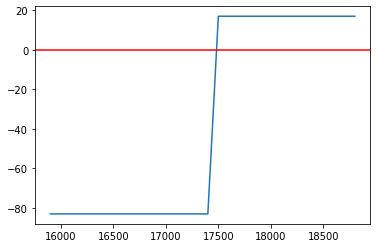

In [6]:
if __name__ == '__main__':
    s = Strategy(17400, 17400, 17500, 242, 325)
    df = s.bull_call_spread()
    print(df)
    
    
    

Buy OTM 17750 CE, Buy OTM 17450 PE
Breakeven_points:(16864, 18336)
Maxloss:-586
Net_Credit:-586
    market_expiry  mx_%deviation  ce_payoff  pe_payoff  strategy_payoff
0           16000      -8.571429       -286       1150              864
1           16100      -8.000000       -286       1050              764
2           16200      -7.428571       -286        950              664
3           16300      -6.857143       -286        850              564
4           16400      -6.285714       -286        750              464
5           16500      -5.714286       -286        650              364
6           16600      -5.142857       -286        550              264
7           16700      -4.571429       -286        450              164
8           16800      -4.000000       -286        350               64
9           16900      -3.428571       -286        250              -36
10          17000      -2.857143       -286        150             -136
11          17100      -2.285714       -

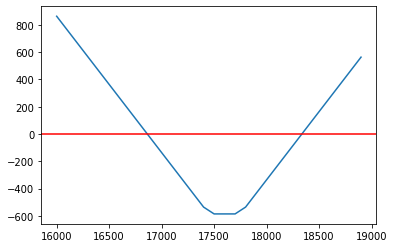

In [55]:
s = Strategy(17450, 17500, 17750, 286, 300)
df = s.long_strangle()
df


Sell OTM 17750 CE, Sell OTM 17450 PE
Breakeven_points:(16864, 18336)
MaxProfit:586
Net_credit:586
    market_expiry  mx_%deviation  ce_payoff  pe_payoff  strategy_payoff
0           16000      -8.571429        286      -1150             -864
1           16100      -8.000000        286      -1050             -764
2           16200      -7.428571        286       -950             -664
3           16300      -6.857143        286       -850             -564
4           16400      -6.285714        286       -750             -464
5           16500      -5.714286        286       -650             -364
6           16600      -5.142857        286       -550             -264
7           16700      -4.571429        286       -450             -164
8           16800      -4.000000        286       -350              -64
9           16900      -3.428571        286       -250               36
10          17000      -2.857143        286       -150              136
11          17100      -2.285714      

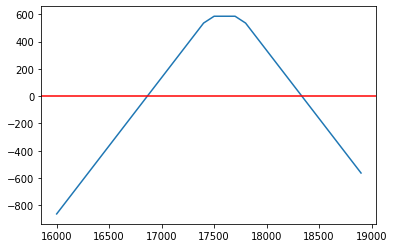

In [56]:
s = Strategy(17450, 17500, 17750, 286, 300)
df = s.short_strangle()
df

Buy ATM 17600 CE, Buy ATM 17600 PE
Breakeven_points:(16875, 18325)
Maxloss:-725
Net_credit:-725
    market_expiry  mx_%deviation  ce_payoff  pe_payoff  strategy_payoff
0           16100      -8.522727       -363       1138              775
1           16200      -7.954545       -363       1038              675
2           16300      -7.386364       -363        938              575
3           16400      -6.818182       -363        838              475
4           16500      -6.250000       -363        738              375
5           16600      -5.681818       -363        638              275
6           16700      -5.113636       -363        538              175
7           16800      -4.545455       -363        438               75
8           16900      -3.977273       -363        338              -25
9           17000      -3.409091       -363        238             -125
10          17100      -2.840909       -363        138             -225
11          17200      -2.272727       -

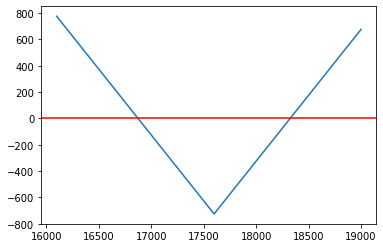

In [57]:
s = Strategy(17600, 17600, 17600, 363, 362)
df = s.long_straddle()
df


Sell ATM 17600 CE, Sell ATM 17600 PE
Breakeven_points:(16875, 18325)
MaxProfit:725
Net_credit:725
    market_expiry  mx_%deviation  ce_payoff  pe_payoff  strategy_payoff
0           16100      -8.522727        363      -1138             -775
1           16200      -7.954545        363      -1038             -675
2           16300      -7.386364        363       -938             -575
3           16400      -6.818182        363       -838             -475
4           16500      -6.250000        363       -738             -375
5           16600      -5.681818        363       -638             -275
6           16700      -5.113636        363       -538             -175
7           16800      -4.545455        363       -438              -75
8           16900      -3.977273        363       -338               25
9           17000      -3.409091        363       -238              125
10          17100      -2.840909        363       -138              225
11          17200      -2.272727      

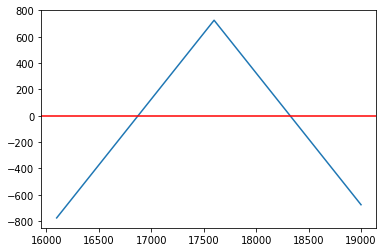

In [92]:
s = Strategy(17600, 17600, 17600, 363, 362)
df = s.short_straddle()
df

Buy 2 OTM 17900 CE, Sell ITM 17300 CE
Breakeven_points:(17411, 18389)
Maxloss:-489
Net_credit:111
    market_expiry  mx_%deviation  otm_ce_payoff  itm_ce_payoff  \
0           16100      -8.522727           -436            547   
1           16200      -7.954545           -436            547   
2           16300      -7.386364           -436            547   
3           16400      -6.818182           -436            547   
4           16500      -6.250000           -436            547   
5           16600      -5.681818           -436            547   
6           16700      -5.113636           -436            547   
7           16800      -4.545455           -436            547   
8           16900      -3.977273           -436            547   
9           17000      -3.409091           -436            547   
10          17100      -2.840909           -436            547   
11          17200      -2.272727           -436            547   
12          17300      -1.704545           -

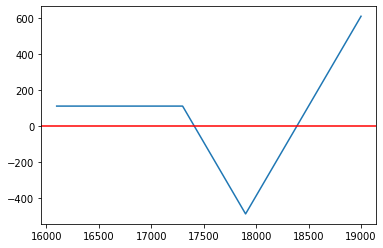

In [94]:
s = Strategy(17300, 17600, 17900, 218*2, 547)
df1 = s.call_ratio_back_spread()
df1

Buy 2 OTM 17300 PE, Sell ITM 17900 PE
Breakeven_points:(16728, 17872)
Maxloss:-572
Net_credit:28
    market_expiry  mx_%deviation  otm_pe_payoff  itm_pe_payoff  \
0           16100      -8.522727           1910          -1282   
1           16200      -7.954545           1710          -1182   
2           16300      -7.386364           1510          -1082   
3           16400      -6.818182           1310           -982   
4           16500      -6.250000           1110           -882   
5           16600      -5.681818            910           -782   
6           16700      -5.113636            710           -682   
7           16800      -4.545455            510           -582   
8           16900      -3.977273            310           -482   
9           17000      -3.409091            110           -382   
10          17100      -2.840909            -90           -282   
11          17200      -2.272727           -290           -182   
12          17300      -1.704545           -4

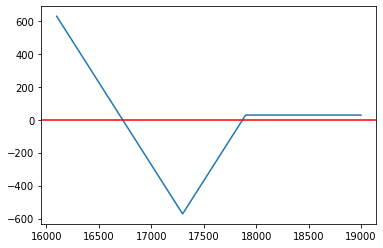

In [99]:
s = Strategy(17300, 17600, 17900, 518, 245*2)
df2 = s.put_ratio_back_spread()
#df2

In [98]:
df1